# Processing and narrating a video with ZhipuAI GLM's visual capabilities

**This tutorial is available in English and is attached below the Chinese explanation**

此代码演示了如何通过视频使用 GLM 的视觉功能。 GLM-4 不直接将视频作为输入，但我们可以使用视觉和新的 128K 上下文窗口来一次性描述整个视频的静态帧。

**由于模型对视频理解的能力有待提高，在这个代码中的视频理解的细节程度无法达到较高水平。**

This cookbook demonstrates how to use GLM's visual capabilities with a video. GLM-4 doesn't take videos as input directly, but we can use vision and the new 128K context window to describe the static frames of a whole video at once. 

**Since the model's ability to understand videos needs to be improved, the level of detail of video understanding in this code cannot reach a high level. **

In [1]:
import os
os.environ["ZHIPUAI_API_KEY"] = "your api key"

In [2]:
from IPython.display import display, Image
import cv2
import base64
from zhipuai import ZhipuAI
client = ZhipuAI()

首先，我们使用 OpenCV 从包含熊和河流的自然视频中提取帧。我们将使用此视频作为 GLM 的输入

First, we use OpenCV to extract frames from a nature video containing bears and a river. We'll use this video as our input to GLM.

In [3]:
video = cv2.VideoCapture("data/movie.mp4")
base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))
video.release()
print(len(base64Frames), "frames read.")

374 frames read.


展示其中视频中的一张图来验证视频读取是否正确

Show a picture from the video to verify whether the video reading is correct

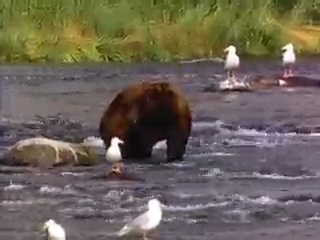

In [4]:
first_image = Image(data=base64.b64decode(base64Frames[100].encode("utf-8")))
display_handle = display(first_image, display_id=True)

一旦我们有了视频帧，我们就制作提示并向 GLM 发送请求（请注意，我们不需要发送每一帧让 GLM 了解发生了什么）：

Once we have the video frames, we craft our prompt and send a request to GLM (Note that we don't need to send every frame for GLM to understand what's going on):


In [5]:
PROMPT_MESSAGES = [{
    "role": "user",
    "content": [
        {
            "type": "text",
            "text": "这些是我上传的视频的帧。请你根据这些视频祯，进行分析并联系图片的上下文关系，生成引人注目的视频描述。让我们开始吧"
        },
        *[
            {
                "type": "image_url",
                "image_url": {
                    "url": frame
                }
            } for frame in base64Frames[0::50]
        ]
    ]
}]

In [6]:
params = {
    "model": "glm-4v",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 20000,
    "temperature": 0.9,
    "top_p": 1,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

在宁静的野生环境中，一只雄伟的棕熊踏进了清澈的河水之中。它被一群好奇的海鸥包围着，海鸥们紧密地围绕在它身边，或许是在寻找食物的机会，或许是好奇地观察这位不速之客。棕熊优雅地移动着，河水泛起涟漪，周围的草地和树木则静静地见证着这一奇妙时刻的展开。
